# SHOW DISTRIBUTION OF HSV VALUES PER PH LEVEL

In [16]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Automated Generation of Distribution Plots


In [17]:
np.random.seed(5)
bins = 200
numImages = 160
alpha = 0.4
# dataDir = "data"
savePath = 'plots//step-step'
preprocessedPath = "step-step"
# setDirs = [os.path.join(dataDir, dir) for dir in os.listdir(dataDir)]
# classDirs = [os.path.join(dir,c) for dir in dataDir for c in os.listdir(dir)] 
classDirs = [os.path.join(preprocessedPath, c) for c in os.listdir(preprocessedPath)]
paths = [os.path.join(classDir,image) for classDir in classDirs for image in os.listdir(classDir)]

## PER LIST WILL BE 3 CHANNELS

hsv_ph6 = []
hsv_ph7 = []
hsv_ph8 = []
hsv_ph9 = []

# if os.path.exists(savePath) == False: os.mkdir(savePath)

for n,path in enumerate(paths):
    if (n%100 == 0) and (n != 0) or (n == len(paths)-1): print("Doing image# ", n)
    ## READING IMAGE
    c = path.split("\\")[1]
    image = cv2.imread(path)
    (hue_values, saturation_values, values) = cv2.split(image)
    
    ## APPENDING TO FINAL LISTS
    ## SHAPE = (IMAGE,(RED,GREEN,BLUE))
    if c == "6" : hsv_ph6.append([hue_values,saturation_values,values])
    elif c == "7" : hsv_ph7.append([hue_values,saturation_values,values])
    elif c == "8" : hsv_ph8.append([hue_values,saturation_values,values])
    elif c == "9" : hsv_ph9.append([hue_values,saturation_values,values])




Doing image#  100
Doing image#  200
Doing image#  300
Doing image#  400
Doing image#  500
Doing image#  600
Doing image#  700
Doing image#  800
Doing image#  900
Doing image#  1000
Doing image#  1048


In [18]:
hsv_ph6 = np.array(hsv_ph6)
hsv_ph7 = np.array(hsv_ph7)
hsv_ph8 = np.array(hsv_ph8)
hsv_ph9 = np.array(hsv_ph9)

np.random.shuffle(hsv_ph6)
np.random.shuffle(hsv_ph7)
np.random.shuffle(hsv_ph8)
np.random.shuffle(hsv_ph9)

hsv_ph6 = hsv_ph6[:numImages].reshape(numImages,3,-1)
hsv_ph7 = hsv_ph7[:numImages].reshape(numImages,3,-1)
hsv_ph8 = hsv_ph8[:numImages].reshape(numImages,3,-1)
hsv_ph9 = hsv_ph9[:numImages].reshape(numImages,3,-1)

lenChannel = hsv_ph6.shape[2]

print(lenChannel)
print(hsv_ph6.shape)
print(hsv_ph7.shape)
print(hsv_ph8.shape)
print(hsv_ph9.shape)

16384
(160, 3, 16384)
(160, 3, 16384)
(160, 3, 16384)
(160, 3, 16384)


In [19]:
def get_zscore(channel_values):
    ## INPUT LIST OF RAW SINGLE CHANNEL VALUES
    ## OUTPUT ZSCORE LIST
    channel_mean = np.mean(channel_values)
    channel_std = np.std(channel_values)
    zscore_ph6_red_values = [(score-channel_mean)/channel_std for score in channel_values if score > 5]
    return zscore_ph6_red_values

def get_channel_values(rgb_values, channel=1): # GETTING saturation ONLY
    ## FOR CHANNEL
    ## 0 == RED
    ## 1 == GREEN
    ## 2 == BLUE
    channel_values = rgb_values[:,channel,:].reshape(1,-1)[0]
    return channel_values

def plot_distribution(ph6 = np.zeros(lenChannel), ph7 = np.zeros(lenChannel), ph8 = np.zeros(lenChannel), ph9 = np.zeros(lenChannel), 
                      name="name", bins = bins, alpha = alpha, savePath=savePath):
    ## DISPLAYS DISTRIBUTION CHANNEL USING HISTOGRAM

    plt.figure(figsize=(15,5))
    plt.xticks(ticks=[-3,-2,-1,0,1,2,3])
    plt.axis(xmin=-3, xmax=3)
    plt.title(f'Distribution {name}', loc='center')

    plt.hist(ph6, bins=bins, color = "red", alpha = alpha)
    plt.hist(ph7, bins=bins, color = "green", alpha = alpha)
    plt.hist(ph8, bins=bins, color = "blue", alpha = alpha)
    plt.hist(ph9, bins=bins, color = "orange", alpha = alpha)

    #### SHOW AND SAVE PLOT
    plt.legend(["pH6", "pH7", "pH8", "pH9"])
    plt.savefig(os.path.join(savePath,f'{name}.png'))
    plt.show()

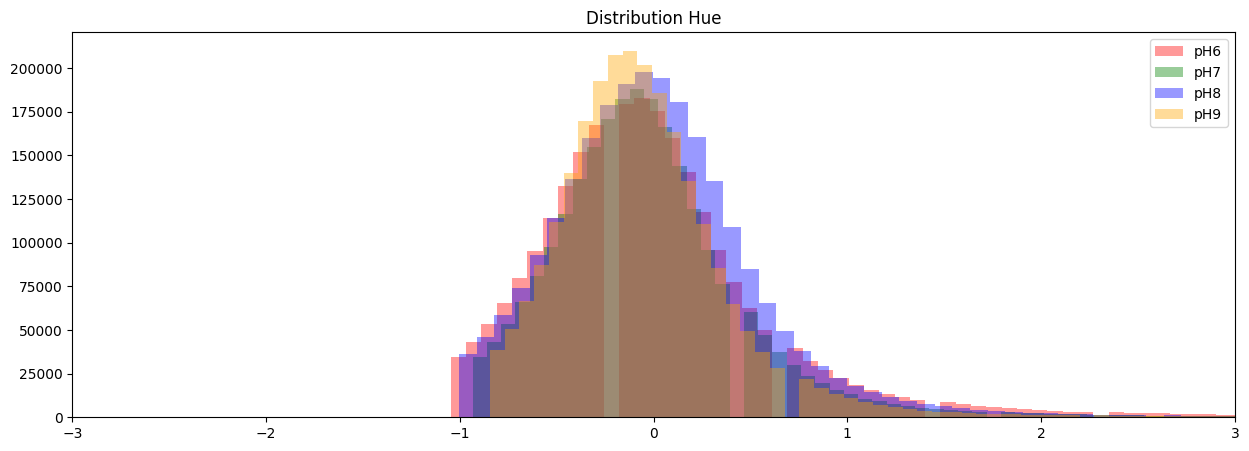

In [20]:
## GETTING ZSCORES
## Values
ph6_values = get_channel_values(hsv_ph6,0)
zscore_ph6_values = get_zscore(ph6_values)

ph7_vales = get_channel_values(hsv_ph7,0)
zscore_ph7_values = get_zscore(ph7_vales)

ph8_values = get_channel_values(hsv_ph8,0)
zscore_ph8_values = get_zscore(ph8_values)

ph9_values = get_channel_values(hsv_ph9,0)
zscore_ph9_values = get_zscore(ph9_values)

## PLOTTTING ZSCORES
plot_distribution(ph6 = zscore_ph6_values, ph7=zscore_ph7_values, ph8=zscore_ph8_values, ph9=zscore_ph9_values, name = "Hue")


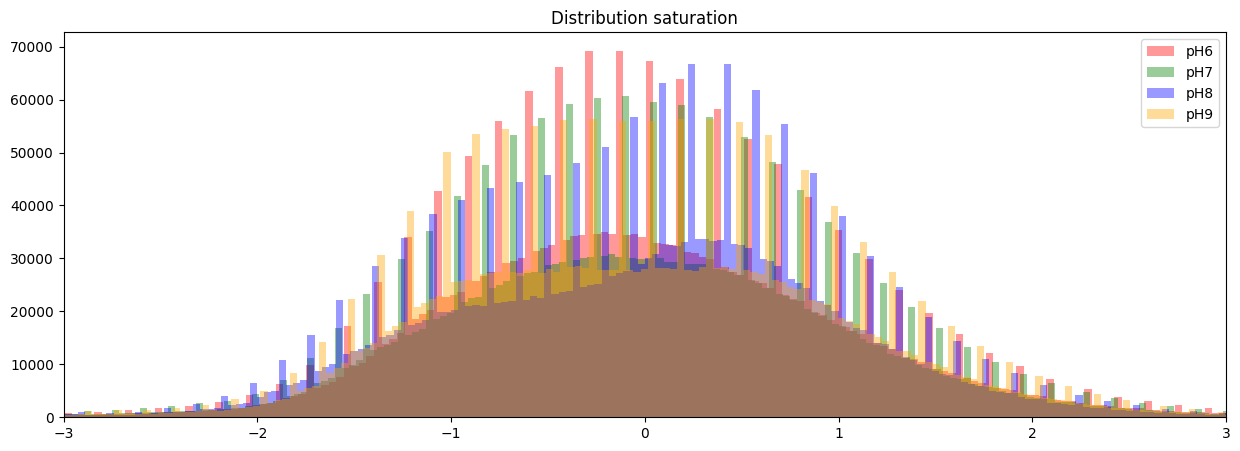

In [21]:
## GETTING ZSCORES
## Values
ph6_values = get_channel_values(hsv_ph6,1)
zscore_ph6_values = get_zscore(ph6_values)

ph7_vales = get_channel_values(hsv_ph7,1)
zscore_ph7_values = get_zscore(ph7_vales)

ph8_values = get_channel_values(hsv_ph8,1)
zscore_ph8_values = get_zscore(ph8_values)

ph9_values = get_channel_values(hsv_ph9,1)
zscore_ph9_values = get_zscore(ph9_values)

## PLOTTTING ZSCORES
plot_distribution(ph6 = zscore_ph6_values,ph7=zscore_ph7_values, ph8=zscore_ph8_values, ph9=zscore_ph9_values, name = "saturation")


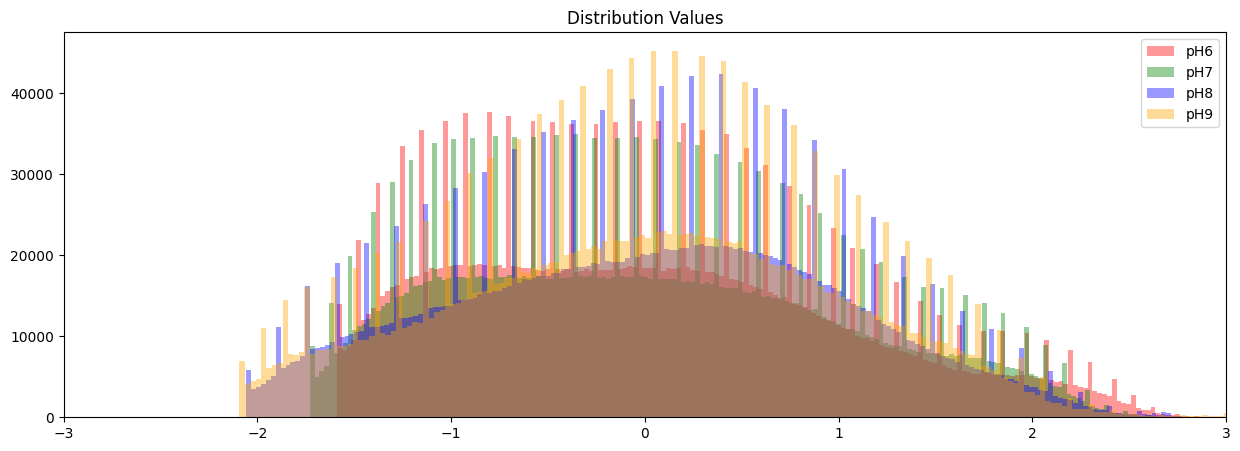

In [22]:
## GETTING ZSCORES
## Values
ph6_red = get_channel_values(hsv_ph6,2)
zscore_ph6_red = get_zscore(ph6_red)

ph7_red = get_channel_values(hsv_ph7,2)
zscore_ph7_red = get_zscore(ph7_red)

ph8_red = get_channel_values(hsv_ph8,2)
zscore_ph8_red = get_zscore(ph8_red)

ph9_red = get_channel_values(hsv_ph9,2)
zscore_ph9_red = get_zscore(ph9_red)

## PLOTTTING ZSCORES
plot_distribution(zscore_ph6_red, zscore_ph7_red, zscore_ph8_red, zscore_ph9_red, name = "Values")
